In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
import csv
import nltk
from matplotlib import pyplot as plt
import os
import re
import warnings
import random
warnings.filterwarnings('ignore')
from collections import Counter,defaultdict
from nltk import word_tokenize
from math import log
import string
import pickle
from math import log
import gensim
from gensim import corpora
from gensim import models
from string import digits
from collections import defaultdict
from scipy.spatial.distance import cosine
import ast
cwd = os.getcwd()

In [3]:
osname = os.name
if osname =='Windows':
    sym = "//"
else:
    sym = "/"

In [4]:
r_path=cwd+sym+'nips_reviewer_data'+sym+'reviewers.txt'
review_df=pd.read_csv(r_path,sep='\t',header=None)
review_df.columns=['sno','name']
review_lt=list(review_df.name)
review_sno={val:ind for ind,val in enumerate(review_lt)}

In [5]:
path1=cwd+sym+'Saved_Items'+sym
with open(path1+'reviewer_vec.pkl','rb') as f:
    reviewer_vec=pickle.load(f)

## Cosine Similarity

In [10]:
n=len(review_lt)
interest_vec=[[0]*n for i in range(n)]
res=0
ctr=0
for i in range(n):
    v1=reviewer_vec[i]
    for j in range(i+1,n):
        v2=reviewer_vec[j]
        val=1-cosine(v1,v2)
        if np.isnan(val):
                val=0
        interest_vec[i][j]=val
        res+=val
        ctr+=1
for i in range(n):
    for j in range(i+1,n):
        interest_vec[j][i]=interest_vec[i][j]
thres1=res/ctr

In [11]:
thres1

0.587660770135503

## Research Interest

In [12]:
path1=cwd+sym+'Saved_Items'+sym
review_det=pd.read_pickle(path1+'author_df.pkl')
review_det= review_det.drop('index', 1)

In [13]:
review_det.head()

,"Valladolid,",Affiliation,Citations,H-index,Author,n-2nd,Papers,pi,research interests,upi
0,NaN,"Res. Center for Microperipherik, Technische Un...",0,0,O. Willum,NaN,1,0.0000,new product;product group;active product;long ...,0.0000
1,NaN,"Dept. of Electr. & Comput. Eng., Drexel Univ.,...",0,0,D. Wei,NaN,1,0.0000,lowpass filter;multidimensional product filter...,0.0000
2,NaN,,0,0,Wenhu Wu,NaN,1,0.0000,MAP adaptation;adaptation data;adaptation utte...,0.0000
3,NaN,"College of Geography Science, Nanjing Normal U...",0,0,Zhiyuan Zeng,NaN,1,0.0000,normalized difference vegetation index;ratio v...,0.0000
4,NaN,"Department of Computer Science, University of ...",0,0,Erzen Hyko,NaN,1,0.0000,information content;Spatio-Temporal Informatio...,0.0000


In [14]:
research_int=[]
for name in review_lt:
    samp_df=review_det[review_det['Author']==name]['research interests']
    ind=samp_df.index
    #print(ind)
    op=''
    for i in ind:
        rint=samp_df[i].split(';')
        rint=filter(None, rint)
        for ele in rint:
            ele=ele.replace(' ','')
            op=op+' '+ele
    op.rstrip()
    research_int.append(op)
        
    

In [15]:
research_int

['',
 '',
 '',
 '',
 ' 2-dimensionalfeaturedetector simultaneousevolution contactcenter customercontactcenter customercontactcentersThestaff schedulingproblem staffscheduling staffschedulingsystem callcenter constraint-basedsystem criticalproblem inboundcallcenter geneticprogramming geneticalgorithm geneticprogrammingThispaper dynamicprogramming partialprogramming reinforcementlearning Cprogramminglanguage GeneticProgrammingGeneticprogramming Lisp-basedhigh-levelpartialprogramming automaticprogrammingtechnique',
 ' proposedmethod automaticdetection proposedapproach novelmethod discriminativemodel automaticmethod objectdetection efficientmethod lattice-boltzmannmethod dynamicmodel discriminantmodel strongmodeladaptation LTVmodel MVfinite-elementmodelin-vivo SQImodel anatomicalmodel authorsmodel biomechanicalmodel measurementmodelonline modeldistribution',
 ' logisticfunction normalizedgeometricmean dropoutgradient dropoutlinearnetwork non-linearlogisticnetworksresult correspondingapprox

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer()
rint_ohe = vectorizer2.fit_transform(research_int)
rint_ohe=rint_ohe.toarray()

## Venue Based

In [17]:
data_df=pd.read_pickle('data_df.pkl')

In [18]:
data_df

,id,author,title,abstract,year,venue
0,53e99f9bb7602d970286e73d,Alan Murray,Adaptive Noisy Neural Computation in Mixed-mod...,We propose a probabilistic neural computation ...,2003,
1,53e99f9bb7602d9702870afd,Alan Murray,Geography 683 - Introduction to Geographic Ana...,,-1,
2,53e99f9bb7602d9702870cfb,David Forsyth,Achieve What We Want Them To? Interdependence ...,,-1,
3,53e99f9bb7602d9702871a1e,Ingo Steinwart,Fast Rates to Bayes for Kernel Machines,We establish learning rates to the Bayes risk ...,2004,NIPS
4,53e99f9bb7602d9702872b1d,David Forsyth,"Primitives, Perceptual Organization and Object...",: We argue that any computational theory of o...,1997,
5,53e99fa2b7602d97028766c6,Olivier Bousquet,Advanced Lectures On Machine Learning: ML Summ...,,2004,Advanced Lectures On Machine Learning: ML Summ...
6,53e99fa2b7602d97028766c6,Ulrike von Luxburg,Advanced Lectures On Machine Learning: ML Summ...,,2004,Advanced Lectures On Machine Learning: ML Summ...
7,53e99fa2b7602d9702876c93,Charles Sutton,Feature Bagging: Preventing Weight Undertraini...,Discriminatively-trained probabilistic models ...,2005,
8,53e99fa2b7602d9702876c93,Andrew McCallum,Feature Bagging: Preventing Weight Undertraini...,Discriminatively-trained probabilistic models ...,2005,
9,53e99fa2b7602d9702877b0d,Dale Schuurmans,Latent Maximum Entropy Approach for Semantic N...,"In this paper, we describe a unified probabil...",2003,AISTATS


In [19]:
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
st = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer 
import re

def cleantext(text):
    
    remove_digits = str.maketrans('', '', digits)
    text = text.translate(remove_digits)
    
    # remove punctuation
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    strip = text.translate(table)
    
    
    # Tokenizer
    tokens = word_tokenize(strip)
    
    # Convert into lower case 
    proc_text = [w.lower() for w in tokens]
    
    # Remove stopwords
    proc_text = [word for word in proc_text if word not in st]
    
    
    #Storing only Lemmmatized words
    lemmatizer=WordNetLemmatizer()
    lemma_text=[lemmatizer.lemmatize(word) for word in proc_text]

    return " ".join(lemma_text)


t = "i am groot2'7"    
cleantext(t)

'groot'

In [20]:
gpby=data_df.groupby('author').aggregate(lambda x:';'.join(x))

In [21]:
gpby

,title,abstract,venue
author,,,
Aapo Hyvarinen,Linguistic Feature Extraction using Independen...,Our aim is to find syntactic and semantic rela...,IJCNN;Journal of the Optical Society of Americ...
Aaron Hertzmann,Introduction to 3D Non-Photorealistic Renderin...,"In these notes, we survey some of the basic to...",;;;CVPR (1);ICCV;ICCV;NIPS;IEEE Trans. Pattern...
Aharon Bar Hillel,Efficient Learning of Relational Object Class ...,We propose a novel approach for shape-based se...,ICCV '05 Proceedings of the Tenth IEEE Interna...
Alan Murray,Adaptive Noisy Neural Computation in Mixed-mod...,We propose a probabilistic neural computation ...,;;Physiological measurement;Regional Studies;U...
Alan Stocker,Computation of smooth optical flow in a feedba...,"In 1986, Tanner and Mead (1) implemented an in...",NIPS;NIPS;NIPS;;AIPR;Optical Engineering
Alan Yuille,Unsupervised dimension reduction and feature e...,";;;Research in computer science, engineering, ...",Neuroimage;Neuroimage;Perception as Bayesian i...
Alex Clark,Flows on solenoids are generically not almost ...,The space of non-singular flows on any given s...,;;Ecology;Qualitative Theory of Dynamical Syst...
Alex Rogers,Multichannel Verification System (MVS): a Dual...,Artel has developed the Multichannel Verificat...,Journal of the Association for Laboratory Auto...
Alex Smola,Kernel PCA and de-noising in feature spaces;Pr...,Kernel PCA as a nonlinear feature extractor h...,NIPS;NIPS;;;;NIPS;;Neural Information Processi...


In [22]:
ind=gpby.index
venue=[list(val.split(';')) for val in gpby['venue']]
venue=[list(filter(None, lt))for lt in venue]
venue=[' '.join(map(cleantext, lt)) for lt in venue]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(venue)
X=X.toarray()

In [24]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
y=len(X[0])
n=len(review_lt)
venue_ohe=[np.zeros(y)]*n

In [26]:
for i,name in enumerate(ind):
    venue_ohe[review_sno[name]]=X[i]

## CoAuth

In [27]:
path1=cwd+sym+'Saved_Items'+sym
with open(path1+'coAuthor.pkl','rb') as f:
    co_auth=pickle.load(f)

## Hindex

In [28]:
path1=cwd+sym+'Saved_Items'+sym
hind=pd.read_csv(path1+'hIndex.txt',header=None)
hind=list(hind[0])

## Graph Building

In [67]:
path1=cwd+sym+'Saved_Items'+sym
with open(path1+'reviewer_vec_bow.pkl','rb') as f:
    reviewer_vec_bow=pickle.load(f)

In [92]:
from sklearn.metrics import jaccard_similarity_score
n=len(review_lt)
adj_mat=[[0]*n for i in range(n)]
for i in range(n):
    for j in range(i+1,n):
        if interest_vec[i][j]>thres1 or co_auth[i][j]:
            rint_scr=jaccard_similarity_score(rint_ohe[i],rint_ohe[j])
            venue_scr=jaccard_similarity_score(venue_ohe[i],venue_ohe[j])
            coauth_scr=1-cosine(co_auth[i],co_auth[j])
            hin=(min(hind[i],hind[j])-min(hind))/(max(hind)-min(hind))           
            
            if np.isnan(rint_scr):
                rint_scr=0
            if np.isnan(venue_scr):
                venue_scr=0
            if np.isnan(coauth_scr):
                coauth_scr=0
            wt2=hin+rint_scr+venue_scr+coauth_scr
            bow_scr=1-cosine(reviewer_vec_bow[i],reviewer_vec_bow[j])
            if np.isnan(bow_scr):
                bow_scr=0
            a=0.6
            wt1=a*interest_vec[i][j]+(1-a)*bow_scr
            b=0.5
            wt=b*wt1+(1-b)*wt2
            adj_mat[i][j]=wt
            
            

In [93]:
import networkx as nx
H=nx.Graph()
n=len(review_lt)
node=[i for i in range(n)]
H.add_nodes_from(node)
for i in range(n):
    for j in range(i+1,n):
        if adj_mat[i][j]:
            H.add_edge(i,j,weight=adj_mat[i][j])


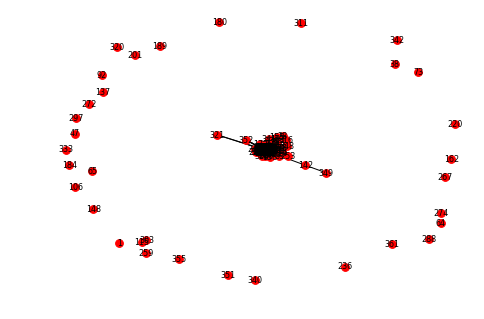

<Figure size 7.2e+21x7.2e+21 with 0 Axes>

In [94]:
pos = nx.spring_layout(H)
nx.draw(H,pos,with_labels=True,node_size=60,font_size=8) 
#nx.draw_networkx_edge_labels(H, pos)
plt.figure(10,figsize=(1e20,1e20)) 
plt.show()

In [95]:
adj_matrix=nx.adj_matrix(H)
adj_matrix= adj_matrix.todense()
adj_matrix = np.array(adj_matrix, dtype = np.float64)

In [96]:
adj_matrix

array([[0.        , 0.        , 0.41911453, ..., 0.        , 0.37074561,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41911453, 0.        , 0.        , ..., 0.        , 0.48240731,
        0.40233386],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.37074561, 0.        , 0.48240731, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.40233386, ..., 0.        , 0.        ,
        0.        ]])

In [97]:
path1=cwd+sym+'Saved_Items'+sym
with open(path1+'reviewer_matrix_temp.pkl','wb') as f:
    pickle.dump(adj_matrix,f)